In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import to_hex
from ipywidgets import interact
from keino import Params, colours, pprint
from ristikko import System, models

# Geometries examples

Various examples of the geometries module. Shown are how to create chains and islands of various shapes on a substrate.

## Square lattice

### No sublattice

#### Chain on substrate

In [2]:
@interact(N1=(0, 50), N2=(0, 50), L=(0, 50), location=["hollow", "bridge"], orientation=["a1", "a2"], spacing=(0, 10), pbc=False, scale=(0.1, 10))
def chain(L=11, N1=15, N2=15, spacing=0, location="hollow", orientation="a1", pbc=False, scale=5):
    params = Params(dict(
        N1 = N1,
        N2 = N2,
        t = 1,
        impurities = dict(
            location = location,
            orientation = orientation,
            spacing = spacing,
            L = L,
            t = 1,
            Gamma = 1,
            pbc = pbc,
        ),
        pbc = False
    ))
    
    sys = System("realspace", "square", params)
    sys.set_geometry("chain")
    aspect = params.N2 / params.N1
    sys.plot(axis_scale=scale, aspect=aspect)

interactive(children=(IntSlider(value=11, description='L', max=50), IntSlider(value=15, description='N1', max=…

In [6]:
# Compare realspace to k-space

params = Params(dict(
    N1 = 11,
    N2 = 1,
    t = 1,
    impurities = dict(
        L = 11,
        t = 1,
        Gamma = 1,
        pbc = True,
    ),
    pbc = True
))

realspace = System("realspace", "square", params)
realspace.set_geometry("chain")

params.N1 = 1
params.impurities.L = 1
kspace = System("kspace", "square", params)
kspace.set_geometry("chain")
kspace.N1 = 11

kspace == realspace

np.True_

#### Rectangular island on substrate

In [7]:
@interact(N1=(0, 50), N2=(0, 50), L=(0, 50), W=(0, 50), pbc=False, scale=(0.1, 10))
def rectangle(L=11, W=6, N1=15, N2=15, pbc=False, scale=5):
    params = Params(dict(
        N1 = N1,
        N2 = N2,
        t = 1,
        impurities = dict(
            L = L,
            W = W,
            t = 1,
            Gamma = 1,
            pbc = pbc,
        ),
        pbc = False
    ))
    
    sys = System("realspace", "square", params)
    sys.set_geometry("rectangle")
    aspect = params.N2 / params.N1
    sys.plot(axis_scale=scale, aspect=aspect)

interactive(children=(IntSlider(value=11, description='L', max=50), IntSlider(value=6, description='W', max=50…

In [4]:
# Compare realspace to k-space

params = Params(dict(
    N1 = 11,
    N2 = 11,
    t = 1,
    impurities = dict(
        L = 11,
        W = 11,
        t = 1,
        Gamma = 1,
        pbc = True,
    ),
    pbc = True
))

realspace = System("realspace", "square", params)
realspace.set_geometry("rectangle")

params.N1 = 1
params.N2 = 1
params.impurities.L = 1
params.impurities.W = 1
kspace = System("kspace", "square", params)
kspace.set_geometry("rectangle")
kspace.N1 = 11
kspace.N2 = 11

kspace == realspace

np.True_

#### Circular island on substrate

In [3]:
@interact(N1=(0, 50), N2=(0, 50), R=(0, 50), scale=(0.1, 10))
def circle(R=6, N1=16, N2=16, scale=5):
    params = Params(dict(
        N1 = N1,
        N2 = N2,
        t = 1,
        impurities = dict(
            R = R,
            t = 1,
            Gamma = 1,
        ),
        pbc = False
    ))
    
    sys = System("realspace", "square", params)
    sys.set_geometry("circle")
    aspect = params.N2 / params.N1
    sys.plot(axis_scale=scale, aspect=aspect)

interactive(children=(IntSlider(value=6, description='R', max=50), IntSlider(value=16, description='N1', max=5…

#### Impurities at random sites

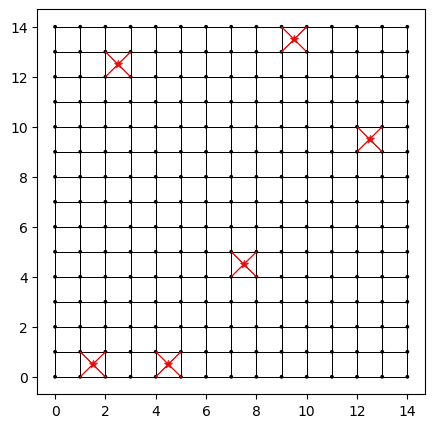

In [16]:
params = Params(dict(
    N1 = 15,
    N2 = 15,
    t = 1,
    impurities = dict(
        t = 1,
        Gamma = 1,
    ),
    pbc = False
))

rng = np.random.default_rng(0)
sites = rng.integers(0, params.N1, size=(6, 2))
coords = sites + (0.5, 0.5)

sys = System("realspace", "square", params)
sys.set_geometry("custom", sites=sites, coords=coords)
aspect = params.N2 / params.N1
sys.plot(axis_scale=5, aspect=aspect)

#### Irregular island

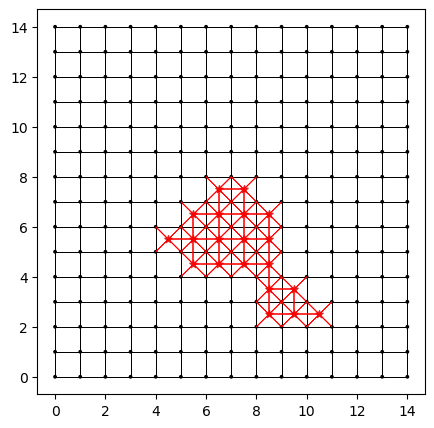

In [28]:
params = Params(dict(
    N1 = 15,
    N2 = 15,
    t = 1,
    impurities = dict(
        t = 1,
        Gamma = 1,
    ),
    pbc = False
))

sites = np.array([
    [6, 6],
    [7, 6],
    [8, 6],
    [6, 5],
    [7, 5],
    [8, 5],
    [5, 4],
    [5, 6],
    [5, 5],
    [6, 4],
    [7, 4],
    [8, 4],
    [8, 3],
    [8, 2],
    [9, 2],
    [10, 2],
    [9, 3],
    [4, 5],
    [6, 7],
    [7, 7],
])
coords = sites + (0.5, 0.5)

sys = System("realspace", "square", params)
sys.set_geometry("custom", sites=sites, coords=coords)
aspect = params.N2 / params.N1
sys.plot(axis_scale=5, aspect=aspect)

### With sublattice

#### Chain on substrate

In [3]:
@interact(N1=(0, 50), N2=(0, 50), L=(0, 50), location=["hollow", "bridge"], orientation=["a1", "a2"], spacing=(0, 10), pbc=False, scale=(0.1, 10))
def chain(L=11, N1=5, N2=1, spacing=0, location="hollow", orientation="a1", pbc=False, scale=5):
    params = Params(dict(
        N1 = N1,
        N2 = N2,
        t = 1,
        impurities = dict(
            location = location,
            orientation = orientation,
            spacing = spacing,
            L = L,
            t = 1,
            Gamma = 1,
            pbc = pbc,
        ),
        pbc = False
    ))

    N1_sub = 3
    N2_sub = 4

    lattice = models.Square()
    sublattice = models.Square(N1=N1_sub, N2=N2_sub)
    lattice.add_sublattice(sublattice)
    
    sys = System("realspace", lattice, params)
    sys.set_geometry("chain")
    aspect = params.N2 / params.N1 * 4/3

    sys.plot(axis_scale=scale, aspect=aspect, site_scale=10)

interactive(children=(IntSlider(value=11, description='L', max=50), IntSlider(value=5, description='N1', max=5…

#### Rectangular island on substrate

In [2]:
@interact(N1=(0, 50), N2=(0, 50), L=(0, 50), W=(0, 50), pbc=False, scale=(0.1, 10))
def rectangle(L=11, W=6, N1=5, N2=5, pbc=False, scale=5):
    params = Params(dict(
        N1 = N1,
        N2 = N2,
        t = 1,
        impurities = dict(
            L = L,
            W = W,
            t = 1,
            Gamma = 1,
            pbc = pbc,
        ),
        pbc = False
    ))
    N1_sub = 3
    N2_sub = 4
    lattice = models.Square()
    sublattice = models.Square(N1=N1_sub, N2=N2_sub)
    lattice.add_sublattice(sublattice)
    
    sys = System("realspace", lattice, params)
    sys.set_geometry("rectangle")
    aspect = params.N2 / params.N1 * N2_sub / N1_sub
            
    sys.plot(axis_scale=scale, aspect=aspect)

interactive(children=(IntSlider(value=11, description='L', max=50), IntSlider(value=6, description='W', max=50…

#### Circular island on substrate

In [3]:
@interact(N1=(0, 50), N2=(0, 50), R=(0, 50), scale=(0.1, 10))
def circle(R=6, N1=6, N2=6, scale=5):
    params = Params(dict(
        N1 = N1,
        N2 = N2,
        t = 1,
        impurities = dict(
            R = R,
            t = 1,
            Gamma = 1,
        ),
        pbc = False
    ))
    N1_sub = 3
    N2_sub = 4
    lattice = models.Square()
    sublattice = models.Square(N1=N1_sub, N2=N2_sub)
    lattice.add_sublattice(sublattice)
    
    sys = System("realspace", lattice, params)
    sys.set_geometry("circle")
    aspect = params.N2 / params.N1 * N2_sub / N1_sub
    sys.plot(axis_scale=scale, aspect=aspect)

interactive(children=(IntSlider(value=6, description='R', max=50), IntSlider(value=6, description='N1', max=50…

## Triangular lattice

### No sublattice

#### Chain on substrate

In [2]:
@interact(N1=(0, 50), N2=(0, 50), L=(0, 50), location=["hollow", "bridge"], orientation=["a1", "a2"], spacing=(0, 10), pbc=False, scale=(0.1, 10))
def chain(L=11, N1=15, N2=15, spacing=0, location="hollow", orientation="a1", pbc=False, scale=5):
    params = Params(dict(
        N1 = N1,
        N2 = N2,
        t = 1,
        impurities = dict(
            location = location,
            orientation = orientation,
            spacing = spacing,
            L = L,
            t = 1,
            Gamma = 1,
            pbc = pbc,
        ),
        pbc = False
    ))
    
    sys = System("realspace", "triangular", params)
    sys.set_geometry("chain")
    aspect = params.N2 / params.N1 / np.sqrt(3)
    sys.plot(axis_scale=scale, aspect=aspect)

interactive(children=(IntSlider(value=11, description='L', max=50), IntSlider(value=15, description='N1', max=…

In [3]:
# Compare realspace to k-space

params = Params(dict(
    N1 = 11,
    N2 = 1,
    t = 1,
    impurities = dict(
        L = 11,
        t = 1,
        Gamma = 1,
        pbc = True,
    ),
    pbc = True
))

realspace = System("realspace", "triangular", params)
realspace.set_geometry("chain")

params.N1 = 1
params.impurities.L = 1
kspace = System("kspace", "triangular", params)
kspace.set_geometry("chain")
kspace.N1 = 11

kspace == realspace

np.True_

### With sublattice

#### Chain on substrate

In [14]:
@interact(N1=(0, 50), N2=(0, 50), L=(0, 50), location=["hollow", "bridge"], orientation=["a1", "a2"], spacing=(0, 10), pbc=False, scale=(0.1, 10))
def chain(L=11, N1=5, N2=5, spacing=0, location="hollow", orientation="a1", pbc=False, scale=5):
    params = Params(dict(
        N1 = N1,
        N2 = N2,
        t = 1,
        impurities = dict(
            location = location,
            orientation = orientation,
            spacing = spacing,
            L = L,
            t = 1,
            Gamma = 1,
            pbc = pbc,
        ),
        pbc = False
    ))
    N1_sub = 3
    N2_sub = 4
    lattice = models.Triangular()
    sublattice = models.Triangular(N1=N1_sub, N2=N2_sub)
    lattice.add_sublattice(sublattice)
    
    sys = System("realspace", lattice, params)
    sys.set_geometry("chain")
    aspect = params.N2 / params.N1  * N1_sub/N2_sub
    sys.plot(axis_scale=scale, aspect=aspect)
    
    slv = sys.lattice.sublattice.lattice_vectors
    basis = sys.lattice.basis

interactive(children=(IntSlider(value=11, description='L', max=50), IntSlider(value=5, description='N1', max=5…

In [16]:
# Compare realspace to k-space

params = Params(dict(
    N1 = 11,
    N2 = 1,
    t = 1,
    impurities = dict(
        L = 11,
        # t = 1,
        # Gamma = 1,
        pbc = True,
    ),
    pbc = True
))
N1_sub = 3
N2_sub = 4
lattice = models.Triangular()
sublattice = models.Triangular(N1=N1_sub, N2=N2_sub)
lattice.add_sublattice(sublattice)

realspace = System("realspace", lattice, params)
realspace.set_geometry("chain")

params.N1 = 1
params.impurities.L = 1
kspace = System("kspace", lattice, params)
kspace.set_geometry("chain")
kspace.N1 = 11

kspace == realspace

np.True_

6.217248937900877e-15


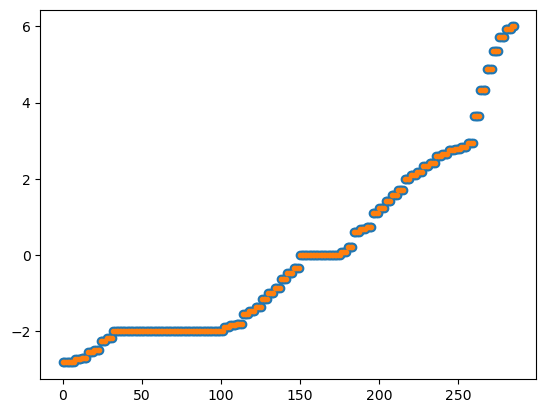

In [17]:
E, E_other = kspace.__eq__(realspace, debug=True)
plt.plot(E, "o")
plt.plot(E_other, ".")

In [ ]:
# 